In [3]:
#Import Required packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Proj/Economic-Pulse/Data/processed_data.csv")
df.head()

,Year,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,...,commodity_Tobacco,commodity_Tree nuts,commodity_U.S. agricultural exports to the world,commodity_U.S. merchandise exports to the world,commodity_U.S. total agricultural imports,commodity_Wheat,commodity_Wine and beer,Value_x_rate_change,Value_y_rate_change,GDP growth_bins
0,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,...,0,0,0,0,0,0,0,NaN,NaN,2
1,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,...,0,0,0,0,0,0,0,0.0,-0.002548,2
2,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,...,0,0,0,0,0,0,0,0.0,-0.013842,2
3,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,...,0,0,0,0,0,0,0,0.0,-0.001710,2
4,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,...,0,0,0,0,0,0,0,0.0,0.054057,2


In [3]:
print(df.isnull().sum())

Year                       0
3 Mo                       0
6 Mo                       0
1 Yr                       0
2 Yr                       0
                          ..
commodity_Wheat            0
commodity_Wine and beer    0
Value_x_rate_change        1
Value_y_rate_change        1
GDP growth_bins            0
Length: 68, dtype: int64


In [20]:
# Separate features and target variable
X = df.drop(['Value_x', 'Value_y'], axis=1)
y = df[['Value_x', 'Value_y']]

In [21]:
# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target variables from numerical features
numerical_features.remove('Value_x')
numerical_features.remove('Value_y')

In [22]:
# Define numerical and categorical transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])


In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Applying PCA on the processed numerical features
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"PCA chose {pca.n_components_} components.")


PCA chose 49 components.


# Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_pca, y_train['Value_x'])

# Predict on test data
rf_preds = rf_model.predict(X_test_pca)

# Evaluate the models
rf_r2 = r2_score(y_test['Value_x'], rf_preds)

rf_mse = mean_squared_error(y_test['Value_x'], rf_preds)

print(f"Random Forest R2: {rf_r2:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")

Random Forest R2: 0.9961
Random Forest MSE: 0.4717


In [25]:
X_df = pd.DataFrame(X_train)

print(X_df.columns)

RangeIndex(start=0, stop=158, step=1)


I see that The R squared value is high which means the model is performing so well

# Feature Importance with Random Forest

Variable:                    0 Importance: 0.45
Variable:                    1 Importance: 0.23
Variable:                    5 Importance: 0.08
Variable:                    2 Importance: 0.07
Variable:                    3 Importance: 0.04
Variable:                    4 Importance: 0.01
Variable:                   12 Importance: 0.01
Variable:                   16 Importance: 0.01
Variable:                   27 Importance: 0.01
Variable:                   28 Importance: 0.01
Variable:                   29 Importance: 0.01
Variable:                   41 Importance: 0.01
Variable:                   44 Importance: 0.01
Variable:                    6 Importance: 0.0
Variable:                    7 Importance: 0.0
Variable:                    8 Importance: 0.0
Variable:                    9 Importance: 0.0
Variable:                   10 Importance: 0.0
Variable:                   11 Importance: 0.0
Variable:                   13 Importance: 0.0
Variable:                   14 Importance: 0.0


ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does not match the number of labels (158).

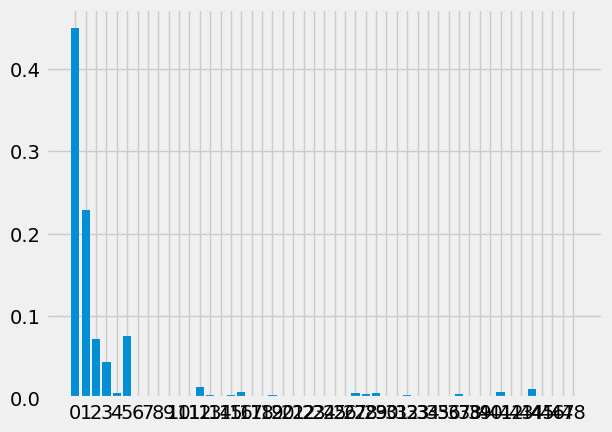

In [26]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Get numerical feature importances
importances = rf_model.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_df.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation='vertical')

plt.xticks(x_values, X_df.columns, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

# Show the plot
plt.tight_layout()
plt.show()


# Time Series Analysis

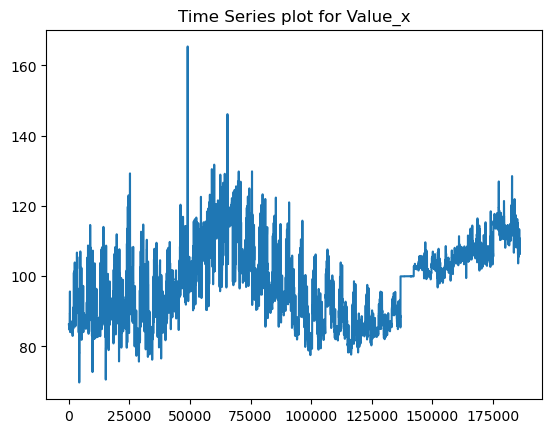

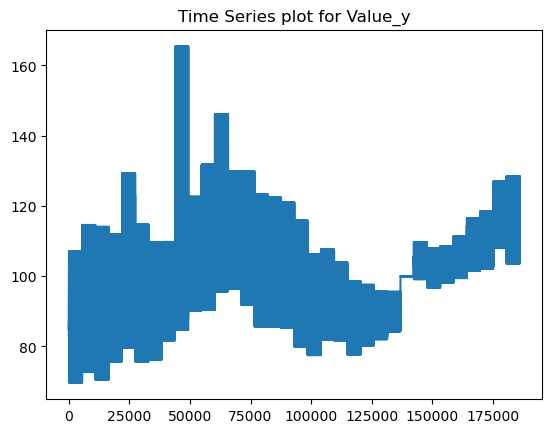

In [6]:
import matplotlib.pyplot as plt

df['Value_x'].plot()
plt.title('Time Series plot for Value_x')
plt.show()

df['Value_y'].plot()
plt.title('Time Series plot for Value_y')
plt.show()


In [7]:
# Check for stationary data
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Value_x'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -10.565537617354105
p-value: 7.533986200504467e-19


# Since p-value is high

In [9]:
df['Differenced_Series'] = df['Value_x'].diff().dropna()

In [8]:
# Check for stationary data
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Value_y'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.9352825886444807
p-value: 0.7761314672218849


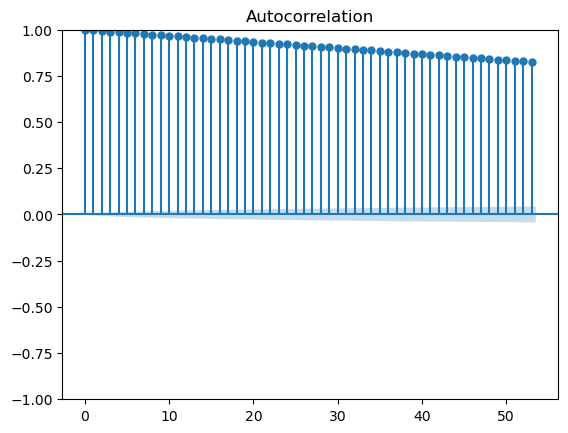

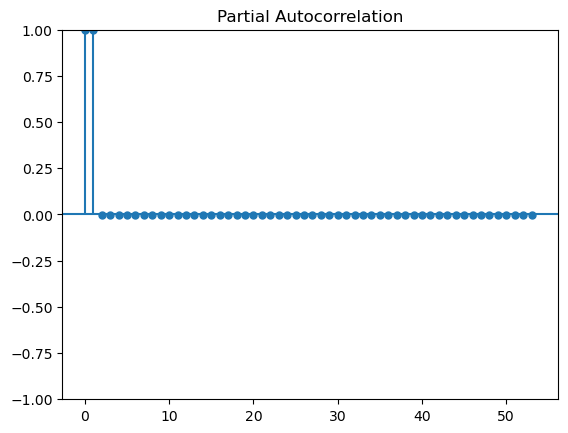

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Value_x'].dropna())
plot_pacf(df['Value_x'].dropna())
plt.show()

In [13]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y') 
df = df.set_index('Year')

train = df['Value_x'][:'2020']
test = df['Value_x']['2021':]

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train)
results = model.fit()


/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


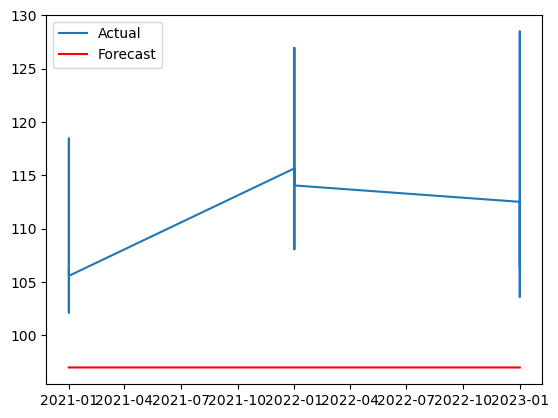

In [16]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

# Compare forecast against actual values
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast_mean)
print('MSE:', mse)


MSE: 225.99899295886422


# Gradient Boosting Model

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

gbm_regressor_x = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor_y = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model for Value_x
gbm_regressor_x.fit(X_train_pca, y_train['Value_x'])

# Fit the model for Value_y
gbm_regressor_y.fit(X_train_pca, y_train['Value_y'])

# Predict on test data for Value_x
y_pred_x = gbm_regressor_x.predict(X_test_pca)

# Predict on test data for Value_y
y_pred_y = gbm_regressor_y.predict(X_test_pca)

# Calculate metrics for Value_x
mse_x = mean_squared_error(y_test['Value_x'], y_pred_x)
r2_x = r2_score(y_test['Value_x'], y_pred_x)

# Calculate metrics for Value_y
mse_y = mean_squared_error(y_test['Value_y'], y_pred_y)
r2_y = r2_score(y_test['Value_y'], y_pred_y)

print(f"Mean Squared Error for Value_x: {mse_x}")
print(f"R^2 Score for Value_x: {r2_x}")
print(f"Mean Squared Error for Value_y: {mse_y}")
print(f"R^2 Score for Value_y: {r2_y}")

Mean Squared Error for Value_x: 17.872196004270272
R^2 Score for Value_x: 0.8528941357108557
Mean Squared Error for Value_y: 20.287990177280918
R^2 Score for Value_y: 0.8324845832132941


# Support Vector Regression

In [32]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svr_pipeline_x = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_pipeline_y = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Fit the model for Value_x
svr_pipeline_x.fit(X_train_pca, y_train['Value_x'])

# Fit the model for Value_y
svr_pipeline_y.fit(X_train_pca, y_train['Value_y'])

# Predict on test data for Value_x
y_pred_svr_x = svr_pipeline_x.predict(X_test_pca)

# Predict on test data for Value_y
y_pred_svr_y = svr_pipeline_y.predict(X_test_pca)

# Calculate metrics for Value_x
mse_svr_x = mean_squared_error(y_test['Value_x'], y_pred_svr_x)
r2_svr_x = r2_score(y_test['Value_x'], y_pred_svr_x)

# Calculate metrics for Value_y
mse_svr_y = mean_squared_error(y_test['Value_y'], y_pred_svr_y)
r2_svr_y = r2_score(y_test['Value_y'], y_pred_svr_y)

print(f"SVR Mean Squared Error for Value_x: {mse_svr_x}")
print(f"SVR R^2 Score for Value_x: {r2_svr_x}")
print(f"SVR Mean Squared Error for Value_y: {mse_svr_y}")
print(f"SVR R^2 Score for Value_y: {r2_svr_y}")


SVR Mean Squared Error for Value_x: 95.7548424299707
SVR R^2 Score for Value_x: 0.21184286183040857
SVR Mean Squared Error for Value_y: 96.36593022280762
SVR R^2 Score for Value_y: 0.20431847490790955


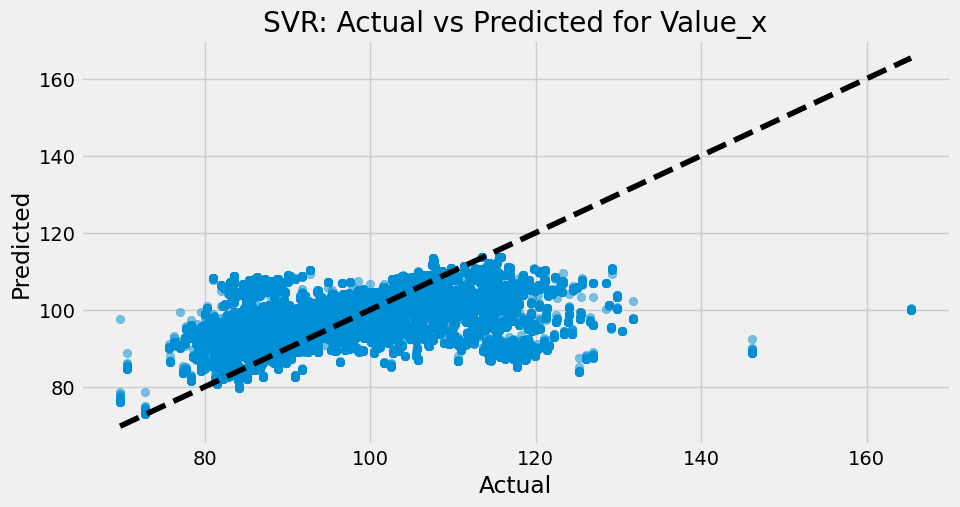

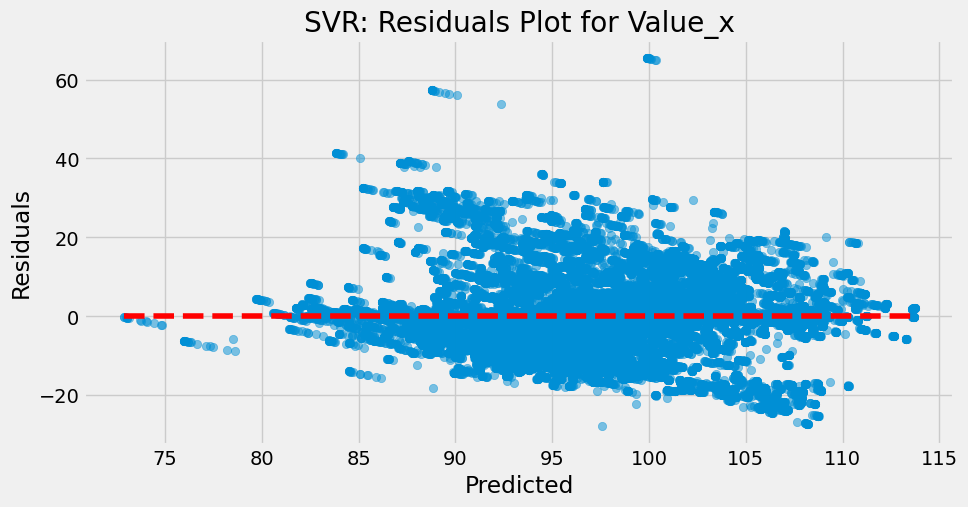

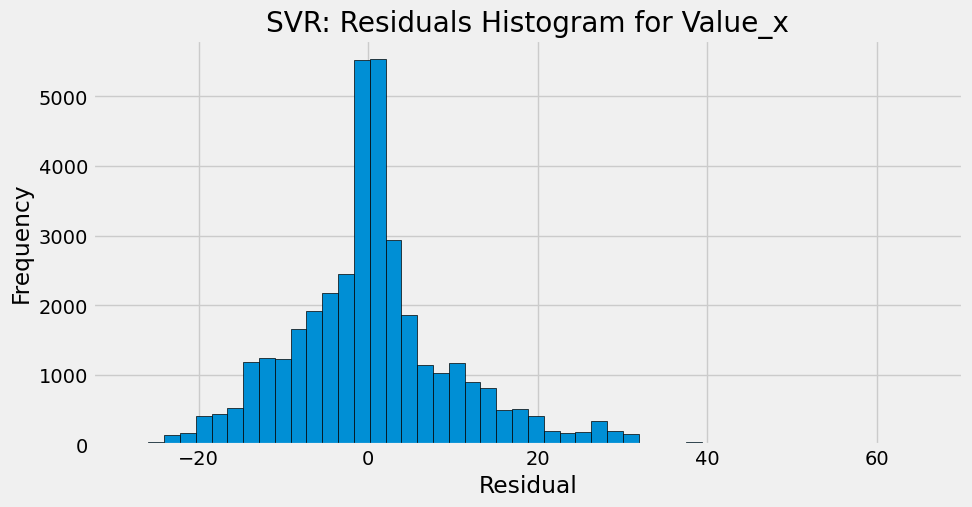

In [35]:
import matplotlib.pyplot as plt

# Make sure to select the correct column for Value_x
actual_x = y_test['Value_x']

# Plot actual vs predicted values for Value_x
plt.figure(figsize=(10, 5))
plt.scatter(actual_x, y_pred_svr_x, alpha=0.5)
plt.plot([actual_x.min(), actual_x.max()], [actual_x.min(), actual_x.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted for Value_x')
plt.show()

# Plot residuals for Value_x
residuals_x = actual_x - y_pred_svr_x
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_svr_x, residuals_x, alpha=0.5)
plt.hlines(0, y_pred_svr_x.min(), y_pred_svr_x.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('SVR: Residuals Plot for Value_x')
plt.show()

# Histogram of residuals for Value_x
plt.figure(figsize=(10, 5))
plt.hist(residuals_x, bins=50, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('SVR: Residuals Histogram for Value_x')
plt.show()
